In [54]:
#!pip install plotnine

In [55]:
import plotnine as p9
from plotnine.data import *
import pandas as pd

In [56]:
df1 = pd.read_csv('log/01-bez_zdjec-proste_UID-uploading_dicom_to_pacs_logs-20220510-000030.csv',
                 usecols = ['number_of_images','last_1k_dicoms_uploadtime','pacs_read_time'])
df1.head()

,number_of_images,last_1k_dicoms_uploadtime,pacs_read_time
0,0,32.310558,0.009214
1,1000,51.077388,0.013126
2,2000,50.222840,0.024873
3,3000,52.228142,0.027754
4,4000,50.350344,0.030948


## Upload DICOM'ów z pustymi zdjęciami i prostym UID (UID jako numer iteracji)

In [57]:
df1.number_of_images = df1.number_of_images + 1000
df1.describe()

,number_of_images,last_1k_dicoms_uploadtime,pacs_read_time
count,500.000000,500.000000,500.000000
mean,250500.000000,49.906989,0.029748
std,144481.832768,1.658500,0.003481
min,1000.000000,32.310558,0.009214
25%,125750.000000,49.141520,0.027717
50%,250500.000000,49.659934,0.029320
75%,375250.000000,50.348665,0.031375
max,500000.000000,63.056751,0.050596


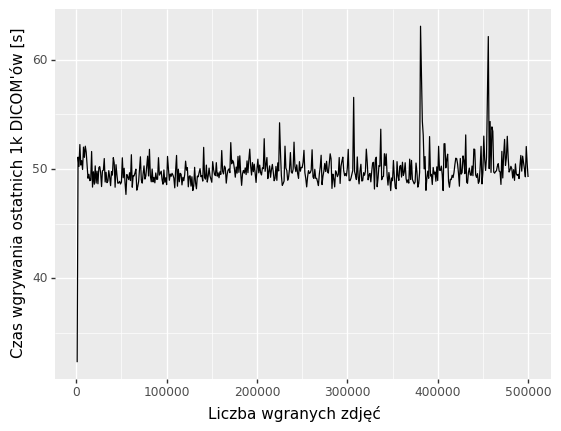

<ggplot: (171521599371)>

In [58]:
(
    ggplot(df1, aes(x="number_of_images"))
    + geom_line(aes(y="last_1k_dicoms_uploadtime"))
    + xlab('Liczba wgranych zdjęć')
    + ylab('Czas wgrywania ostatnich 1k DICOM\'ów [s]')
)


# 

### Upload DICOM'ów z pustymi zdjęciami 

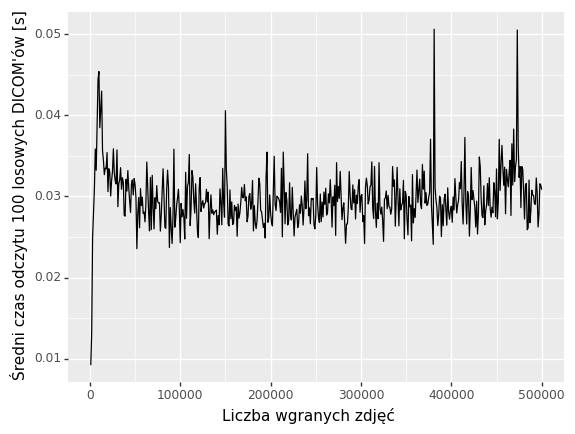

<ggplot: (171520946866)>

In [59]:
(
    ggplot(df1, aes(x="number_of_images"))
    + geom_line(aes(y="pacs_read_time"))
    + xlab('Liczba wgranych zdjęć')
    + ylab('Średni czas odczytu 100 losowych DICOM\'ów [s]')
)


# Sprawdzić czas odczytu po restarcie 
# sprawdzić czu baza danych nie ma opcji czyszczenia data cache

#schemat bazy dołączyć do pracy

## Upload DICOM'ów z pustymi zdjęciami i normalnym UID (numer iteracji doklejony na koniec normalnego UID)

In [60]:
df2 = pd.read_csv('log/02-bez_zdjec-normalne_UID-uploading_dicom_to_pacs_logs-20220510-222552.csv',
                 usecols = ['number_of_images','last_1k_dicoms_uploadtime','pacs_read_time'])

df2.number_of_images = df2.number_of_images + 1000

df2.describe()

,number_of_images,last_1k_dicoms_uploadtime,pacs_read_time
count,500.000000,500.000000,500.000000
mean,250500.000000,59.098220,0.007180
std,144481.832768,6.918484,0.003465
min,1000.000000,48.800063,0.006173
25%,125750.000000,53.801931,0.006633
50%,250500.000000,58.101282,0.006781
75%,375250.000000,62.639245,0.006980
max,500000.000000,89.619544,0.071789


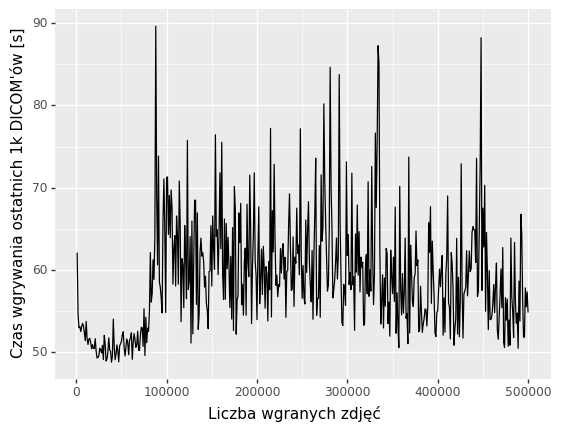

<ggplot: (171520951257)>

In [61]:
(
    ggplot(df2, aes(x="number_of_images"))
    + geom_line(aes(y="last_1k_dicoms_uploadtime"))
    + xlab('Liczba wgranych zdjęć')
    + ylab('Czas wgrywania ostatnich 1k DICOM\'ów [s]')
)

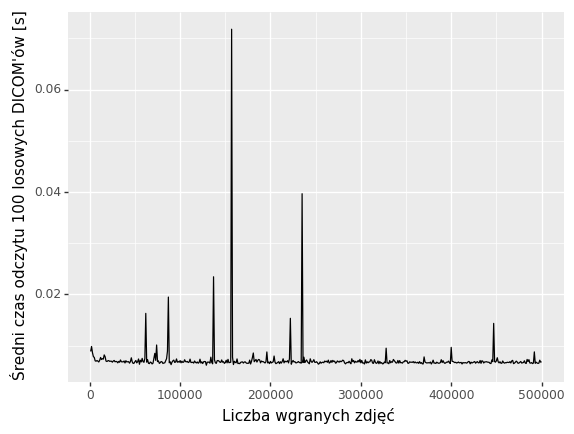

<ggplot: (171520847879)>

In [62]:
(
    ggplot(df2, aes(x="number_of_images"))
    + geom_line(aes(y="pacs_read_time"))
    + xlab('Liczba wgranych zdjęć')
    + ylab('Średni czas odczytu 100 losowych DICOM\'ów [s]')
)

In [63]:
df2.drop( df2[df2["pacs_read_time"] > 0.01].index, inplace = True )

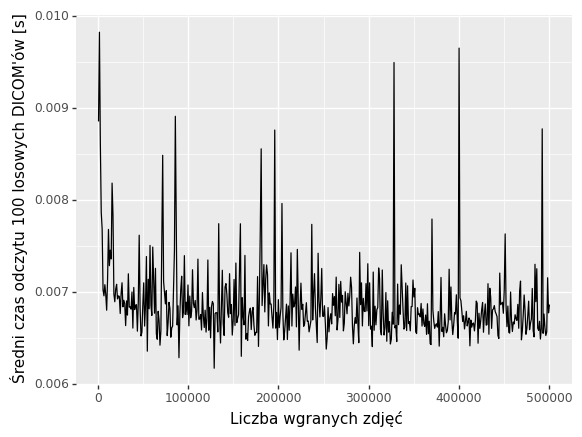

<ggplot: (171520564661)>

In [64]:
(
    ggplot(df2, aes(x="number_of_images"))
    + geom_line(aes(y="pacs_read_time"))
    + xlab('Liczba wgranych zdjęć')
    + ylab('Średni czas odczytu 100 losowych DICOM\'ów [s]')
)

## Upload DICOM'ów w zależności od rodzaju dysku

In [101]:
df3 = pd.read_csv('log/03-zdjecia-rozne_dyski-uploading_dicom_to_pacs_logs.csv')
df3['meas_no'] = df3['meas_no'] - 1
df3['mean_time'] = df3.groupby(['upload_type','disc_type']).upload_time.transform('mean')
df3.head(100)

,meas_no,upload_type,upload_time,disc_type,mean_time
0,0,iteracyjny,39.394789,HDD,29.281827
1,1,iteracyjny,28.268484,HDD,29.281827
2,2,iteracyjny,26.841735,HDD,29.281827
3,3,iteracyjny,28.354543,HDD,29.281827
4,4,iteracyjny,28.022478,HDD,29.281827
5,5,iteracyjny,28.117499,HDD,29.281827
6,6,iteracyjny,27.890299,HDD,29.281827
7,7,iteracyjny,27.364785,HDD,29.281827
8,0,batchowy,376.716592,HDD,365.131586
9,1,batchowy,365.099444,HDD,365.131586


In [102]:
df3.describe()

,meas_no,upload_time,mean_time
count,32.000000,32.000000,32.000000
mean,3.500000,196.970683,196.970683
std,2.327951,171.083890,170.959687
min,0.000000,25.164762,28.126084
25%,1.750000,27.989433,28.992891
50%,3.500000,196.347382,197.206706
75%,5.250000,365.213767,365.184498
max,7.000000,383.365060,365.343236


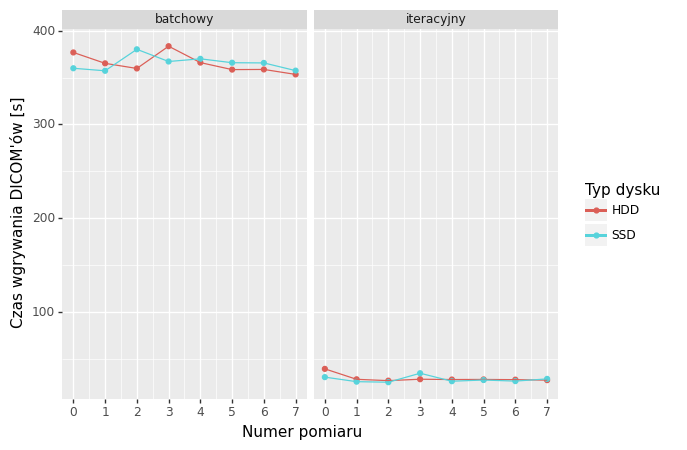

<ggplot: (171523695601)>

In [106]:
(
    ggplot(df3, aes(x='meas_no', y='upload_time'))
    + geom_point(aes(color='disc_type'))
    + geom_line(aes(color='disc_type'))
    + facet_wrap(['upload_type'])
    + scale_x_continuous(breaks=range(0, 8))
    + xlab('Numer pomiaru')
    + ylab('Czas wgrywania DICOM\'ów [s]')
    + labs(color='Typ dysku')
)

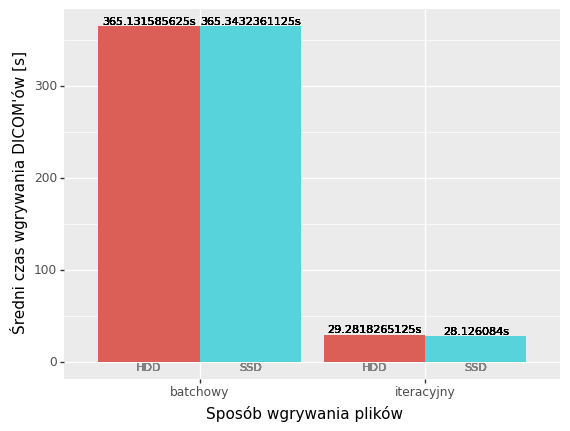

<ggplot: (171520761844)>

In [153]:
dodge_text = position_dodge(width=0.9)

(ggplot(df3, aes(x='upload_type', y='mean_time', fill='disc_type'))
    + geom_col(stat='identity', position='dodge', show_legend=False)
    + geom_text(aes(y=-.5, label='disc_type'),
             position=dodge_text,
             color='gray', size=8, va='top')
    + geom_text(aes(label='mean_time'),
             position=dodge_text,
             size=8, va='bottom', format_string='{}s')
    + xlab('Sposób wgrywania plików')
    + ylab('Średni czas wgrywania DICOM\'ów [s]')
)

## Upload DICOM'ów w zależności od jednostki operacyjnej

In [155]:
df4 = pd.read_csv('log/04-zdjecia-rozne_jednostki-uploading_dicom_to_pacs_logs.csv')
df4['meas_no'] = df4['meas_no'] - 1
df4['mean_time'] = df4.groupby(['upload_type','unit_type']).upload_time.transform('mean')
df4.head()

,meas_no,upload_type,upload_time,unit_type,mean_time
0,0,iteracyjny,30.579628,PC_host,28.126084
1,1,iteracyjny,25.749052,PC_host,28.126084
2,2,iteracyjny,25.164762,PC_host,28.126084
3,3,iteracyjny,34.740823,PC_host,28.126084
4,4,iteracyjny,26.228932,PC_host,28.126084


In [156]:
df4.describe()

,meas_no,upload_time,mean_time
count,48.000000,48.000000,48.000000
mean,3.500000,270.020004,270.020004
std,2.315535,193.098514,193.055862
min,0.000000,25.164762,28.126084
25%,1.750000,97.752270,99.025217
50%,3.500000,254.607844,257.716185
75%,5.250000,410.521599,411.175553
max,7.000000,571.530765,566.360800


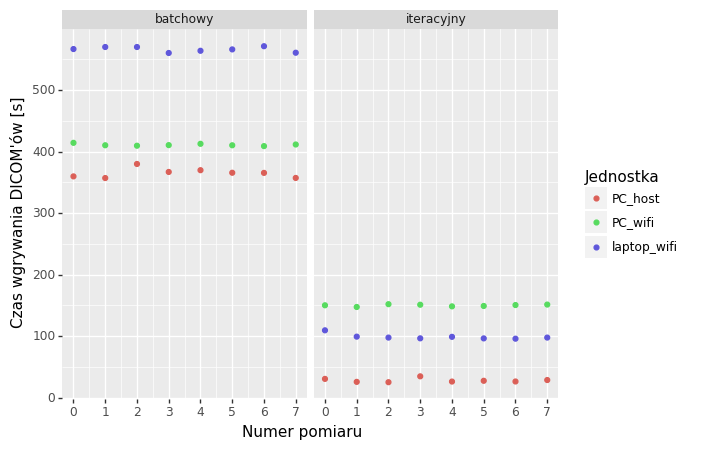

<ggplot: (171520742795)>

In [157]:
(
    ggplot(df4, aes(x='meas_no', y='upload_time'))
    + geom_point(aes(color='unit_type'))
    + facet_wrap(['upload_type'])
    + scale_x_continuous(breaks=range(0, 8))
    + xlab('Numer pomiaru')
    + ylab('Czas wgrywania DICOM\'ów [s]')
    + labs(color='Jednostka')
)

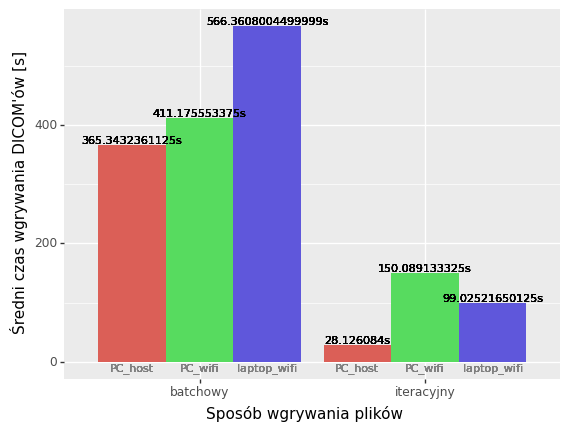

<ggplot: (171521296029)>

In [158]:
dodge_text = position_dodge(width=0.9)

(ggplot(df4, aes(x='upload_type', y='mean_time', fill='unit_type'))
    + geom_col(stat='identity', position='dodge', show_legend=False)
    + geom_text(aes(y=-.5, label='unit_type'),
             position=dodge_text,
             color='gray', size=8, va='top')
    + geom_text(aes(label='mean_time'),
             position=dodge_text,
             size=8, va='bottom', format_string='{}s')
    + xlab('Sposób wgrywania plików')
    + ylab('Średni czas wgrywania DICOM\'ów [s]')
)